# Import libraries

In [1]:
# Install Chefboost package 
!pip install chefboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import nltk 
from chefboost import Chefboost as chef
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Nahid\\Downloads'

# Load dataset

In [4]:
cd=pd.read_excel('bangla_online_comments_dataset.xlsx')
cd

,comment,Category,Gender,comment react number,label,Prediction
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,1
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,0
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,0
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,0
4,পটকা মাছ,Politician,Male,0.0,troll,1
...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,0
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,0
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,0
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,0


# Data analysis

<AxesSubplot:xlabel='label', ylabel='count'>

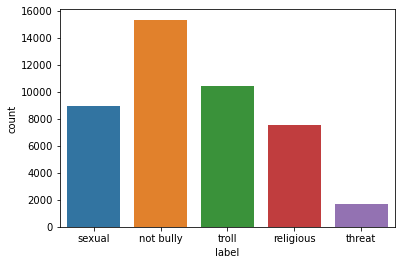

In [5]:
import seaborn as sns
sns.countplot(x='label',data=cd)

In [6]:
cd=cd.drop(['Category','Gender','comment react number','label'],axis=1)
cd

,comment,Prediction
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,0
2,"অরে বাবা, এই টা কোন পাগল????",0
3,ক্যাপ্টেন অফ বাংলাদেশ,0
4,পটকা মাছ,1
...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",0
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,0
43998,হিরো ভাই তুমি এগিয়ে য়াও,0
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,0


In [7]:
# Print shape of dataset.
print('Dataset shape is ', cd.shape)

Dataset shape is  (44001, 2)


In [8]:
cd['Prediction'].value_counts(normalize=True)*100

1    65.137156
0    34.862844
Name: Prediction, dtype: float64

<AxesSubplot:>

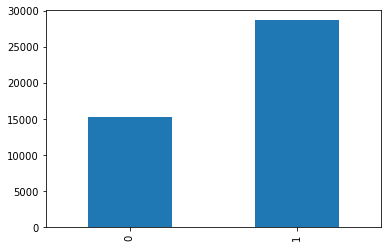

In [9]:
cd['Prediction'].value_counts().sort_index().plot.bar()

In [10]:
cd.to_csv('output.csv','r', encoding='utf-8')
cd

,comment,Prediction
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,0
2,"অরে বাবা, এই টা কোন পাগল????",0
3,ক্যাপ্টেন অফ বাংলাদেশ,0
4,পটকা মাছ,1
...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",0
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,0
43998,হিরো ভাই তুমি এগিয়ে য়াও,0
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,0


# Data preprocessing

In [11]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [12]:
#remove punctuation
import re
import emoji
def remove_punc(text):
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_fullstop = u"\u0964"
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    punc = u"[৷–()—,$%^&*+={}\[\]:\"|\'\~`<>/,€¦!?½£¶™¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    text= whitespace.sub(" ",text).strip()
    text= re.sub(punctSeq, " ", text)
    text = re.sub(bangla_fullstop, " ",text)
    text = re.sub(punc, " ", text)
    text = re.sub('\w*\d\w*', " ", text)
def get_emoji_regexp():
    text = re.sub(emoji.get_emoji_regexp(), "", text)
    return text

In [13]:
cd['Clean']= cd['comment'].apply(lambda x: remove_punc(x))
cd

,comment,Prediction,Clean
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,None
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,0,None
2,"অরে বাবা, এই টা কোন পাগল????",0,None
3,ক্যাপ্টেন অফ বাংলাদেশ,0,None
4,পটকা মাছ,1,None
...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",0,None
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,0,None
43998,হিরো ভাই তুমি এগিয়ে য়াও,0,None
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,0,None


In [14]:
#tokenization
import nltk
nltk.download('punkt')
cd['new'] = cd.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nahid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
cd

,comment,Prediction,Clean,new
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,None,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,0,None,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের..."
2,"অরে বাবা, এই টা কোন পাগল????",0,None,"[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]"
3,ক্যাপ্টেন অফ বাংলাদেশ,0,None,"[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,1,None,"[পটকা, মাছ]"
...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",0,None,"[হিরো, আলম, ,, ,, এগিয়ে, যাও]"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,0,None,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ..."
43998,হিরো ভাই তুমি এগিয়ে য়াও,0,None,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]"
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,0,None,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প..."


In [16]:
#Stopword
stopwords="অতএব অথচ অথবা অনুযায়ী অনেক অনেকে অনেকেই অন্তত অন্য অবধি অবশ্য অর্থাত আই আগামী আগে আগেই আছে আজ আদ্যভাগে আপনার আপনি আবার আমরা আমাকে আমাদের আমার আমি আর আরও ই ইত্যাদি ইহা উচিত উত্তর উনি উপর উপরে এ এঁদের এঁরা এই একই একটি একবার একে এক্ এখন এখনও এখানে এখানেই এটা এটাই এটি এত এতটাই এতে এদের এব এবং এবার এমন এমনকী এমনি এর এরা এল এস এসে ঐ ও ওঁদের ওঁর ওঁরা ওই ওকে ওখানে ওদের ওর ওরা কখনও কত কবে কমনে কয়েক কয়েকটি করছে করছেন করতে করবে করবেন করলে করলেন করা করাই করায় করার করি করিতে করিয়া করিয়ে করে করেই করেছিলেন করেছে করেছেন করেন কাউকে কাছ কাছে কাজ কাজে কারও কারণ কি কিংবা কিছু কিছুই কিন্তু কী কে কেউ কেউই কেখা কেন কোটি কোন কোনও কোনো ক্ষেত্রে কয়েক খুব গিয়ে গিয়েছে গিয়ে গুলি গেছে গেল গেলে গোটা চলে চান চায় চার চালু চেয়ে চেষ্টা ছাড়া ছাড়াও ছিল ছিলেন জন জনকে জনের জন্য জন্যওজে জানতে জানা জানানো জানায় জানিয়ে জানিয়েছে জে জ্নজন টি ঠিক তখন তত তথা তবু তবে তা তাঁকে তাঁদের তাঁর তাঁরা তাঁাহারা তাই তাও তাকে তাতে তাদের তার তারপর তারা তারৈ তাহলে তাহা তাহাতে তাহার তিনঐ তিনি তিনিও তুমি তুলে তেমন তো তোমার থাকবে থাকবেন থাকা থাকায় থাকে থাকেন থেকে থেকেই থেকেও দিকে দিতে দিন দিয়ে দিয়েছে দিয়েছেন দিলেন দু দুই দুটি দুটো দেওয়া দেওয়ার দেওয়া দেখতে দেখা দেখে দেন দেয় দ্বারা ধরা ধরে ধামার নতুন নয় না নাই নাকি নাগাদ নানা নিজে নিজেই নিজেদের নিজের নিতে নিয়ে নিয়ে নেই নেওয়া নেওয়ার নেওয়া নয় পক্ষে পর পরে পরেই পরেও পর্যন্ত পাওয়া পাচ পারি পারে পারেন পি পেয়ে পেয়্র্ প্রতি প্রথম প্রভৃতি প্রযন্ত প্রাথমিক প্রায় প্রায় ফলে ফিরে ফের বক্তব্য বদলে বন বরং বলতে বলল বললেন বলা বলে বলেছেন বলেন বসে বহু বা বাদে বার বি বিনা বিভিন্ন বিশেষ বিষয়টি বেশ বেশি ব্যবহার ব্যাপারে ভাবে ভাবেই মতো মতোই মধ্যভাগে মধ্যে মধ্যেই মধ্যেও মনে মাত্র মাধ্যমে মোট মোটেই যখন যত যতটা যথেষ্ট যদি যদিও যা যাঁর যাঁরা যাওয়া যাওয়ার যাওয়া যাকে যাচ্ছে যাতে যাদের যান যাবে যায় যার যারা যিনি যে যেখানে যেতে যেন যেমন র রকম রয়েছে রাখা রেখে লক্ষ শুধু শুরু সঙ্গে সঙ্গেও সব সবার সমস্ত সম্প্রতি সহ সহিত সাধারণ সামনে সি সুতরাং সে সেই সেখান সেখানে সেটা সেটাই সেটাও সেটি স্পষ্ট স্বয়ং হইতে হইবে হইয়া হওয়া হওয়ায় হওয়ার হচ্ছে হত হতে হতেই হন হবে হবেন হয় হয়তো হয়নি হয়ে হয়েই হয়েছিল হয়েছে হয়েছেন হল হলে হলেই হলেও হলো হাজার হিসাবে হৈলে হোক হয়"
doc=stopwords.split()
doc


['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [17]:
def reomve_stopwrds(text):
    text=[word for word in text if word not in doc]
    return text

In [18]:
cd['cmt_r_wrds']= cd['new'].apply(lambda x: reomve_stopwrds(x))
cd

,comment,Prediction,Clean,new,cmt_r_wrds
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,None,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,0,None,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ?, ক্যামের...","[ঘরে, শুট, কেমন, লেগেছে, ?, ক্যামেরাতে, ?]"
2,"অরে বাবা, এই টা কোন পাগল????",0,None,"[অরে, বাবা, ,, এই, টা, কোন, পাগল, ?, ?, ?, ?]","[অরে, বাবা, ,, টা, পাগল, ?, ?, ?, ?]"
3,ক্যাপ্টেন অফ বাংলাদেশ,0,None,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,1,None,"[পটকা, মাছ]","[পটকা, মাছ]"
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",0,None,"[হিরো, আলম, ,, ,, এগিয়ে, যাও]","[হিরো, আলম, ,, ,, এগিয়ে, যাও]"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,0,None,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ...","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]"
43998,হিরো ভাই তুমি এগিয়ে য়াও,0,None,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]"
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,0,None,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ..."


In [19]:
x=cd.iloc[:, 4]
y=cd.iloc[:, 1]

In [20]:
import gensim
from gensim.models import Word2Vec
model1 = gensim.models.Word2Vec(x,vector_size=100, window=5, min_count=1, workers=4)

In [21]:
vec=model1.wv['জামাই']-model1.wv['আদর']+model1.wv['শালা']

In [22]:
model1.wv.most_similar([vec])

[('শালা', 0.999618649482727),
 ('সালা', 0.9838600158691406),
 ('বেটা', 0.9805804491043091),
 ('কুওার', 0.9798876047134399),
 ('মাদারচোদ', 0.9797152876853943),
 ('পুত', 0.9780870079994202),
 ('বলদা', 0.9768692255020142),
 ('ব্যাটা', 0.9748429656028748),
 ('পোলা', 0.9728414416313171),
 ('সালার', 0.9725977778434753)]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda doc1: doc1, lowercase=False)
X = vec.fit_transform(x)
print(X.shape)
X
#print(vec.get_feature_names())

#from sklearn.feature_extraction.text import CountVectorizer 
#vectorizer =CountVectorizer(tokenizer=lambda doc: doc, lowercase=False).fit_transform(z)
#X=vectorizer.toarray()
#X[50]

(44001, 74313)


<44001x74313 sparse matrix of type '<class 'numpy.int64'>'
	with 502161 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state = 1)

# RF

In [25]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(x_train,y_train)
y_pred=rclf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1995,  371],
       [ 624, 3611]], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2366
           1       0.91      0.85      0.88      4235

    accuracy                           0.85      6601
   macro avg       0.83      0.85      0.84      6601
weighted avg       0.85      0.85      0.85      6601



In [28]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.8492652628389638

# SVM

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state = 2)

In [30]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
#C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None
SVM.fit(x_train, y_train)
#predict the labels on validation dataset
y_pred = SVM.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1995,  354],
       [ 501, 3751]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2349
           1       0.91      0.88      0.90      4252

    accuracy                           0.87      6601
   macro avg       0.86      0.87      0.86      6601
weighted avg       0.87      0.87      0.87      6601



In [33]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.8704741705802151

# DT

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1924,  425],
       [ 654, 3598]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2349
           1       0.89      0.85      0.87      4252

    accuracy                           0.84      6601
   macro avg       0.82      0.83      0.83      6601
weighted avg       0.84      0.84      0.84      6601



In [37]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.836539918194213

# MLP

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=50, activation='relu',max_iter=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1946,  403],
       [ 595, 3657]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2349
           1       0.90      0.86      0.88      4252

    accuracy                           0.85      6601
   macro avg       0.83      0.84      0.84      6601
weighted avg       0.85      0.85      0.85      6601



In [41]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.8488107862445085

# KNN

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state = 1)

In [43]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.87      0.69      2366
           1       0.90      0.65      0.75      4235

    accuracy                           0.73      6601
   macro avg       0.74      0.76      0.72      6601
weighted avg       0.78      0.73      0.73      6601



In [45]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.7257991213452507

# ADa

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state = 1)

In [47]:
#Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 823, 1543],
       [ 101, 4134]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.35      0.50      2366
           1       0.73      0.98      0.83      4235

    accuracy                           0.75      6601
   macro avg       0.81      0.66      0.67      6601
weighted avg       0.79      0.75      0.71      6601



In [50]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.7509468262384488